In [1]:
import json
import pandas as pd

In [2]:
with open("w_dict.json", "r") as f:
    w_dict = json.load(f)
with open("ap_dict.json", "r") as f:
    ap_dict = json.load(f)
with open("technique_dict.json", "r") as f:
    technique_dict = json.load(f)
with open("tactic_dict.json", "r") as f:
    tactic_dict = json.load(f)
with open("cwe_names.json", "r") as f:
    cwe_names = json.load(f)
with open("ap_names.json", "r") as f:
    ap_names = json.load(f)
with open("technique_names.json", "r") as f:
    technique_names = json.load(f)
with open("tactic_names.json", "r") as f:
    tactic_names = json.load(f)
with open("ap_mitigation_descriptions.json", "r") as f:
    ap_mitigation_descriptions = json.load(f)
with open("cwe_mitigation_descriptions.json", "r") as f:
    cwe_mitigation_descriptions = json.load(f)
with open("tech_mitigation_names.json", "r") as f:
    tech_mitigation_names = json.load(f)
with open("tech_detection_names.json", "r") as f:
    tech_detection_names = json.load(f)
with open("ap_detection_descriptions.json", "r") as f:
    ap_detection_descriptions = json.load(f)
with open("cwe_detection_descriptions.json", "r") as f:
    cwe_detection_descriptions = json.load(f)

In [3]:
spaCy_probs = pd.read_csv("link_probs_spaCy_cwe_capec.csv")
BoW_probs = pd.read_csv("link_probs_BoW_spaCy_cwe_capec.csv")
BERT_probs = pd.read_csv("link_probs_BERT_cwe_capec.csv")

BoW_probs.drop(columns="spaCy link probability", inplace=True)

df = BoW_probs.merge(spaCy_probs, on=["CAPEC", "CWE", "CAPEC name", "CWE name"])
df = df.merge(BERT_probs, on=["CAPEC", "CWE", "CAPEC name", "CWE name"])

In [4]:
threshold = 0.94
top_link_probs = df[
    (df["BoW link probability"] >= threshold)
    & (df["spaCy link probability"] >= threshold)
    & (df["BERT link probability"] >= threshold)
]
top_link_probs.sort_values(
    by=["BERT link probability", "spaCy link probability", "BoW link probability"],
    ascending=False,
    inplace=True,
)
top_link_probs

/home/ubuntu/venv_BRON_ML/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CAPEC,CWE,CAPEC name,CWE name,BoW link probability,spaCy link probability,BERT link probability
239054,capec_00741,cwe_01442,Web Application Fingerprinting,Exposure of Sensitive Information to an Unauth...,0.98,0.96,1.00
81096,capec_00665,cwe_01442,Forceful Browsing,Exposure of Sensitive Information to an Unauth...,0.98,0.94,1.00
39778,capec_00619,cwe_01442,Manipulating Opaque Client-based Data Tokens,Exposure of Sensitive Information to an Unauth...,0.95,1.00,0.99
288379,capec_01011,cwe_01442,Use of Known Domain Credentials,Exposure of Sensitive Information to an Unauth...,0.95,0.99,0.99
44982,capec_00663,cwe_01442,AJAX Footprinting,Exposure of Sensitive Information to an Unauth...,1.00,0.96,0.99
216933,capec_00783,cwe_01442,XML Routing Detour Attacks,Exposure of Sensitive Information to an Unauth...,0.97,0.98,0.98
138925,capec_00596,cwe_01442,Dictionary-based Password Attack,Exposure of Sensitive Information to an Unauth...,0.95,0.98,0.98
264989,capec_00922,cwe_01442,HTTP Parameter Pollution (HPP),Exposure of Sensitive Information to an Unauth...,0.96,0.96,0.98
373856,capec_00743,cwe_01441,Flash Parameter Injection,Improper Input Validation,0.96,0.94,0.98
404343,capec_00678,cwe_01442,Session Sidejacking,Exposure of Sensitive Information to an Unauth...,0.98,1.00,0.97


In [5]:
top_links_list = []

for cwe in w_dict:
    links_with_cwe = top_link_probs[top_link_probs["CWE"] == cwe.split("/")[1]]
    max_index = min(len(links_with_cwe), 1)
    links_with_cwe = links_with_cwe[:max_index]
    top_links_list.append(links_with_cwe)

top_links = pd.concat(top_links_list).drop_duplicates()
len(top_links)

10

In [6]:
f = open("cwe_temp.json")
cwe = json.load(f)

f = open("capec_temp.json")
capec = json.load(f)

top_links_dict = top_links.to_dict("list")
top_links_dict["CWE original ID"] = []
top_links_dict["CAPEC original ID"] = []
for cwe_id in top_links_dict["CWE"]:
    for w in cwe:
        if cwe_id == w["_key"]:
            top_links_dict["CWE original ID"].append(w["original_id"])
            break
for ap_id in top_links_dict["CAPEC"]:
    for ap in capec:
        if ap_id == ap["_key"]:
            top_links_dict["CAPEC original ID"].append(ap["original_id"])
            break
top_links = pd.DataFrame(top_links_dict)

In [7]:
link_probs_over_50 = df[
    (df["BoW link probability"] >= 0.5)
    & (df["spaCy link probability"] >= 0.5)
    & (df["BERT link probability"] >= 0.5)
]
len(link_probs_over_50) / len(df)

0.0888684903248416

In [8]:
pd.set_option("display.max_colwidth", 0)
top_links

,CAPEC,CWE,CAPEC name,CWE name,BoW link probability,spaCy link probability,BERT link probability,CWE original ID,CAPEC original ID
0,capec_00650,cwe_01424,Using Unicode Encoding to Bypass Validation Logic,Incorrect Behavior Order: Validate Before Filter,1.00,0.96,0.95,181,71
1,capec_00743,cwe_01441,Flash Parameter Injection,Improper Input Validation,0.96,0.94,0.98,20,174
2,capec_00741,cwe_01442,Web Application Fingerprinting,Exposure of Sensitive Information to an Unauthorized Actor,0.98,0.96,1.00,200,170
3,capec_00659,cwe_01521,Using UTF-8 Encoding to Bypass Validation Logic,Improper Authorization,1.00,0.97,0.94,285,80
4,capec_00639,cwe_01523,Reusing Session IDs (aka Session Replay),Improper Authentication,0.94,0.94,0.95,287,60
5,capec_01099,cwe_01527,Use of Known Kerberos Credentials,Authentication Bypass by Spoofing,0.94,0.98,0.96,290,652
6,capec_00749,cwe_01585,Exploiting Incorrectly Configured Access Control Security Levels,Origin Validation Error,0.97,0.95,0.94,346,180
7,capec_00657,cwe_01907,Using Escaped Slashes in Alternate Encoding,Protection Mechanism Failure,0.95,0.94,0.97,693,78
8,capec_00638,cwe_01911,Session Credential Falsification through Prediction,Incorrect Comparison,0.96,0.95,0.97,697,59
9,capec_00652,cwe_01925,User-Controlled Filename,Improper Neutralization of Special Elements in Output Used by a Downstream Component ('Injection'),0.97,0.95,0.95,74,73


In [9]:
import spacy

encode = spacy.load("en_core_web_lg")

names = list(top_links["CAPEC name"]) + list(top_links["CWE name"])

names_embeddings = []

for i in range(len(names)):
    names_embeddings.append(encode(names[i]).vector)

In [10]:
def get_hidden_state(model, text):
    inputs = tokenizer(text.lower(), truncation=True, return_tensors="pt")
    outputs = model(**inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states
    return hidden_states[-1][:, 0, :].detach().cpu().numpy().flatten()

In [11]:
from transformers import AutoModel, AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
pretrained_model = AutoModel.from_pretrained("bert-base-uncased")

# model_path = "bert_base"
# finetuned_model = AutoModelForMaskedLM.from_pretrained(model_path)

names = list(top_links["CAPEC name"]) + list(top_links["CWE name"])

names_embeddings = []

for i in range(len(names)):
    names_embeddings.append(get_hidden_state(pretrained_model, names[i]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(names_embeddings).T

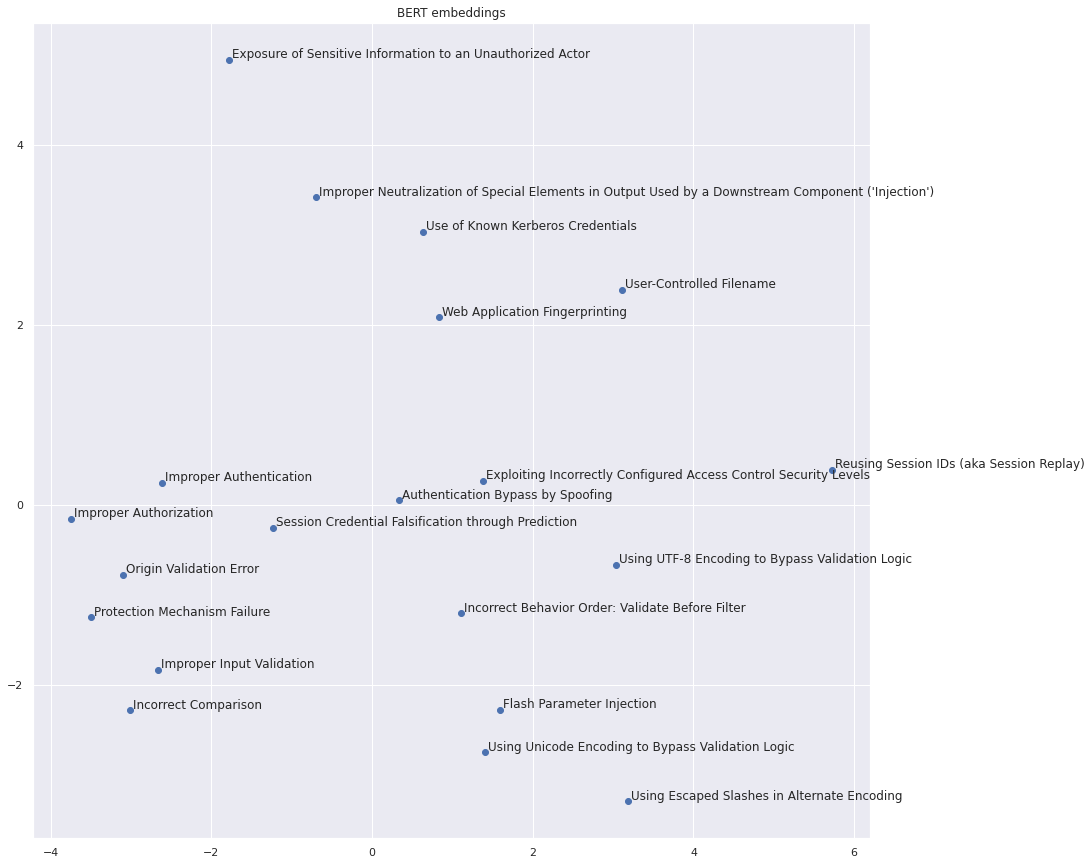

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

x, y = data[0], data[1]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x, y)

for i, term in enumerate(names):
    ax.annotate(term, (x[i], y[i]), xytext=(3, 2), textcoords="offset points")

plt.title("BERT embeddings")
plt.show()